<a href="https://colab.research.google.com/github/pjcroxas/Talent-Retention-in-Railway-Workforce/blob/main/Talent_Retention_in_Railway_Workforce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, math

In [3]:
dir = "/content/drive/My Drive/Data Science Portfolio/2024/Talent Retention"

In [4]:
dir = "/content/drive/My Drive/Data Science Portfolio/2024/Talent Retention"
tr_df = pd.read_excel(dir+"/talent-retention-dataset.xlsx")
tr_df.head()

,Age,Sex,HighestEducationalAttainment,YearsofService,Occupation,Organization,NatureofEmployment,JE1,JE2,JE3,...,TM26,ER1,ER2,ER3,ER4,ER5,ER6,ER7,ER8,ER9
0,36-40,Male,Bachelor's Degree,11-15 Years,Government Employee,Light Rail Transit Authority (LRTA),Permanent,3,4,2,...,3,3,3,3,3,3,3,3,3,3
1,46-50,Male,Bachelor's Degree,16-20 Years,Tranport operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,4,5,5,...,2,3,4,4,4,3,3,5,5,3
2,36-40,Male,Bachelor's Degree,11-15 Years,Transport Operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,4,5,3,...,4,4,5,5,5,3,3,5,5,4
3,46-50,Male,Bachelor's Degree,16-20 Years,Transport Operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,5,4,5,...,5,3,4,3,4,3,3,5,5,3
4,26-30,Male,Bachelor's Degree,6-10 Years,Train Driver A,Light Rail Transit Authority (LRTA),Contractual,5,5,4,...,5,3,5,5,5,5,3,5,5,3


In [5]:
tr_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JE1', 'JE2', 'JE3',
       'JE4', 'JE5', 'JE6', 'JE7', 'JE8', 'JE9', 'JE10', 'JE11', 'JE12', 'TM1',
       'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'TM8', 'TM9', 'TM10', 'TM11',
       'TM12', 'TM13', 'TM14', 'TM15', 'TM16', 'TM17', 'TM18', 'TM19', 'TM20',
       'TM21', 'TM22', 'TM23', 'TM24', 'TM25', 'TM26', 'ER1', 'ER2', 'ER3',
       'ER4', 'ER5', 'ER6', 'ER7', 'ER8', 'ER9'],
      dtype='object')

In [8]:
# Select factorable features
tr_fa = tr_df.drop(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment'], axis=1)

## **Adequacy Test**
Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

- Bartlett's Test
- Kaiser-Meyer-Olkin Test


1. *Bartlett's test* of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [13]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(tr_fa)
print("chi-square:", chi_square_value)
print("p-value:", p_value)

chi-square: 12754.226147053816
p-value: 0.0


- Using bartlett's test, the value is 0. This means that the test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

2. *Kaiser-Meyer-Olkin (KMO) Test* measures the **suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. `Lower` proportion id more suitable for factor analysis. KMO values ranegs from 0 to 1. General rule is that KMO with value less than 0.6 is considered inadequate.

In [15]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(tr_fa)
print("KMO Model:", kmo_model)

KMO Model: 0.9627160992296756


/usr/local/lib/python3.11/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


The KMO of this data is 0.96 which indicates that the we can proceed to factor analysis.

## **Factor Analysis**

In [26]:
from factor_analyzer import FactorAnalyzer

In [64]:
# Instantiate model
factor_model = FactorAnalyzer(n_factors=3, rotation="varimax")
factor_model.fit(tr_fa)

# Check eigenvalues
ev, v = factor_model.get_eigenvalues()
print(ev)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[23.53129556  3.2589691   2.45678145  1.76702184  1.72875696  0.97092284
  0.8774674   0.78152547  0.73784214  0.68936943  0.65504588  0.58510875
  0.56583979  0.51230918  0.47942383  0.46781293  0.42759064  0.4087876
  0.38995598  0.35930222  0.35228457  0.33449638  0.32286997  0.30929712
  0.29598051  0.27226191  0.26191814  0.25219777  0.24595961  0.23000612
  0.21853522  0.2092527   0.20306643  0.18802813  0.17710636  0.16715195
  0.1573123   0.15287424  0.14484679  0.13751019  0.12179164  0.11244716
  0.11102013  0.1068955   0.09586583  0.08776818  0.08012616]


Here, we can see that only 5 eigenvalues are greater than 1 (23.53, 3.26, 2.46, 1.77, and 1.73). This indicates that we are limited to a maximum of 5 factors. Let's validate this result using scree plot.

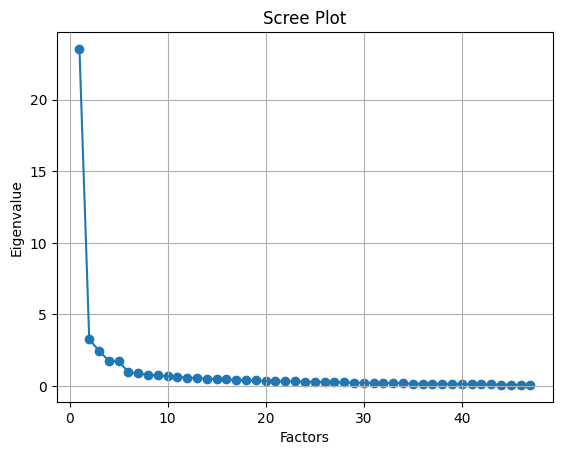

In [57]:
plt.scatter(range(1, tr_fa.shape[1]+1), ev)
plt.plot(range(1, tr_fa.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## **Performing Factor Analysis**

In [77]:
factor_model = FactorAnalyzer(n_factors=3, rotation="varimax")
factor_model.fit(tr_fa)
# factor_model.loadings_
np.shape(factor_model.loadings_)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(47, 3)

In [72]:
np.shape(factor_model.loadings_)

(47, 4)

In [73]:
len(tr_fa.columns)

47

In [78]:
cols = ['Factor-1', 'Factor-2', 'Factor-3']
factors = pd.DataFrame(factor_model.loadings_, index=tr_fa.columns, columns=cols)
factors

,Factor-1,Factor-2,Factor-3
JE1,0.470811,0.514594,0.227311
JE2,0.320113,0.666320,0.121686
JE3,0.284295,0.589633,-0.028790
JE4,0.367097,0.687664,-0.030064
JE5,0.243804,0.792872,0.154256
JE6,0.309958,0.748339,0.173211
JE7,0.261130,0.734481,0.114099
JE8,0.230656,0.735213,0.091976
JE9,0.187595,0.614064,-0.053917
JE10,0.193248,0.642895,-0.057478


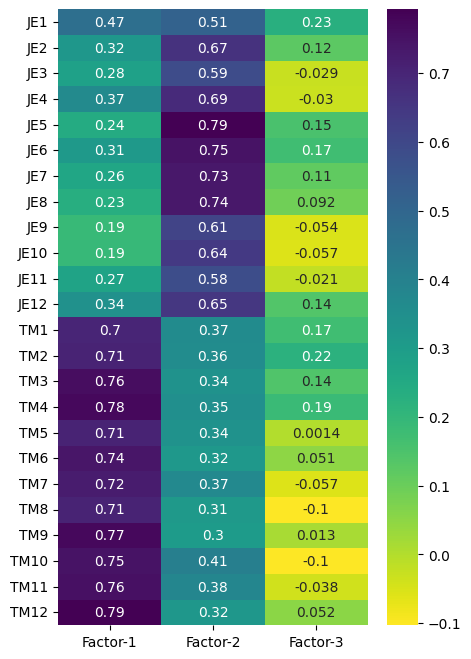

In [87]:
plt.figure(figsize=(5, 8))
sns.heatmap(factors[:24], annot=True, cmap='viridis_r')
plt.show()

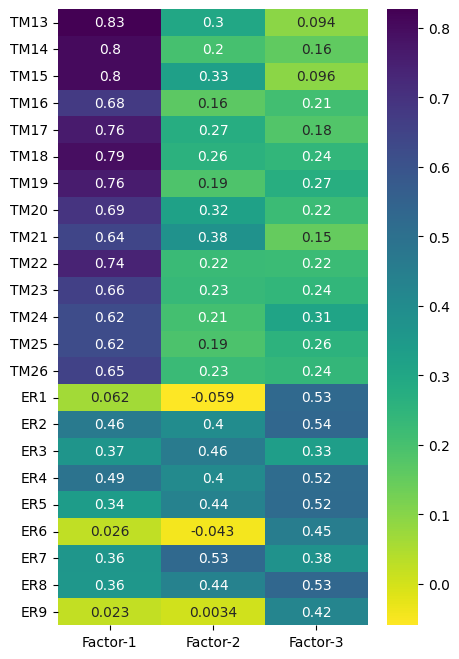

In [88]:
plt.figure(figsize=(5, 8))
sns.heatmap(factors[24:48], annot=True, cmap='viridis_r')
plt.show()